# Polinomio de Hermite
Dado x y y, y las derivadas

In [10]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

In [11]:
x = sp.symbols('x')

In [12]:
term1 = (1- x)**2 * (1+2*x) + x**2 * (3-2*x) * sp.exp(1)
term2= x * (1-x)**2 + x**2 * (x-1) * sp.exp(1)

In [13]:
H= term1 + term2
#Simbolica
H_simp= sp.simplify(H).evalf()
H_simp
#Función numérica
H_num= sp.lambdify(x, H_simp)


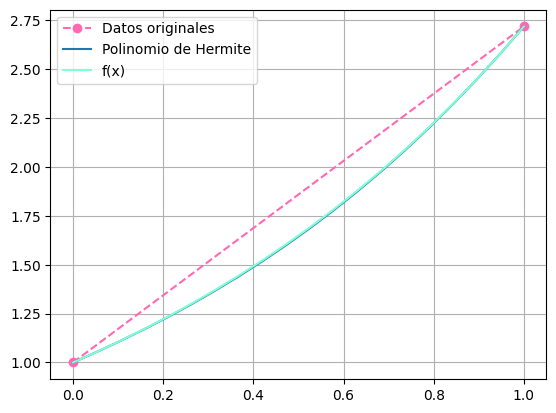

In [14]:
#Datos
x = np.array([0,1])
f = lambda x: np.exp(x)
y= f(x)

#Interpolación
x_interp= np.linspace(min(x), max(x), 20)


plt.plot(x, y, color='hotpink', marker= 'o', linestyle='--',label = 'Datos originales')
plt.plot(x_interp, H_num(x_interp),label= 'Polinomio de Hermite')
plt.plot(x_interp, f(x_interp), color= 'aquamarine',label='f(x)')
plt.grid()
plt.legend()

In [15]:
from scipy.interpolate import interp1d

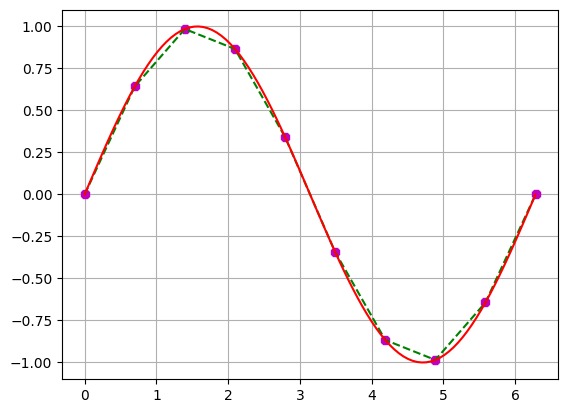

In [16]:
#Datos
x= np.linspace(0, 2*np.pi, 10)
f = lambda x: np.sin(x)
y=f(x)

#Función de interpolación lineal 
Pol_Lineal= interp1d(x,y)

#Puntos de interpolación 
x_interp = np.linspace(min(x), max(x), 100)

#Grafico
plt.plot(x, y, 'm8', label='Puntos')
plt.plot( x_interp, Pol_Lineal(x_interp), 'g--', label=' Interpolación lineal')
plt.plot(x_interp, f(x_interp),'r', label='f(x)')
plt.legend
plt.grid()

In [17]:
from scipy.interpolate import lagrange

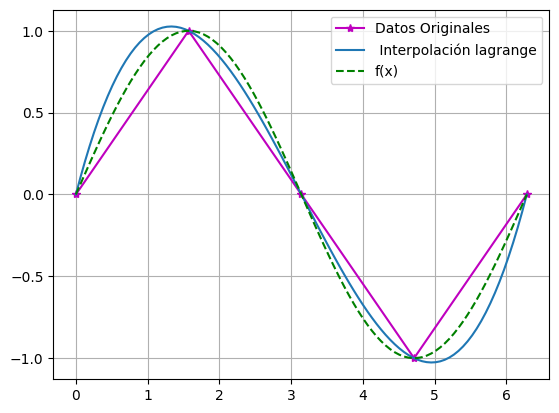

In [18]:
#Datos
x= np.linspace(0, 2*np.pi, 5)
f = lambda x: np.sin(x)
y=f(x)

#Polinomio de lagrange
Pol_lagrange= lagrange(x,y)

#Puntos de interpolación
x_interp = np.linspace(min(x), max(x), 100)

#Graficamos
plt.plot(x, y, 'm*-', label='Datos Originales')
plt.plot( x_interp, Pol_lagrange(x_interp), label=' Interpolación lagrange')
plt.plot(x_interp, f(x_interp),'g--', label='f(x)')
plt.legend()
plt.grid()

In [19]:
from scipy.interpolate import CubicHermiteSpline

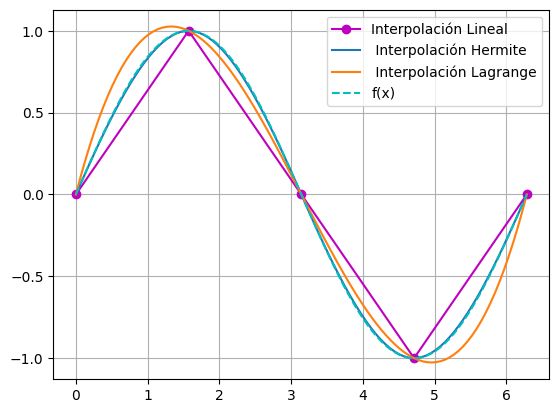

In [20]:
#Datos
x= np.linspace(0, 2*np.pi, 5)
f = lambda x: np.sin(x)
y=f(x)
fprime= lambda x: np.cos(x)
yp= fprime(x)
#Polinomio de Hermite
Pol_Hermite= CubicHermiteSpline(x, y, yp)

#Polinomio de lagrange
Pol_lagrange= lagrange(x,y)

#Función de interpolación lineal 
Pol_Lineal= interp1d(x,y)

#Puntos a interpolar 
x_interp= np.linspace(min(x), max(x), 100)

#Grafico 
plt.plot(x, y, 'mo-', label='Interpolación Lineal')
plt.plot( x_interp, Pol_Hermite(x_interp), label=' Interpolación Hermite')
plt.plot( x_interp, Pol_lagrange(x_interp), label=' Interpolación Lagrange')
plt.plot(x_interp, f(x_interp),'c--', label='f(x)')
plt.legend()
plt.grid()

In [25]:
def error_pol(P_n, f, x_interp):
    error= abs(P_n(x_interp)-f(x_interp))
    print( max(error))

In [26]:
error_lineal=error_pol(Pol_Lineal, f, x_interp)
error_lagrange= error

0.2104898986351913
